In [37]:
import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Lesson8
## task1

In [5]:
boston = load_boston()

In [10]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [91]:
X = pd.DataFrame(boston['data'], columns=boston.feature_names)
y = boston['target']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
St_scaler = StandardScaler()

In [94]:
X_train_scaled = pd.DataFrame(St_scaler.fit_transform(X_train),
                              columns=boston['feature_names'])
X_test_scaled = pd.DataFrame(St_scaler.transform(X_test),
                             columns=boston['feature_names'])

In [95]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [96]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [97]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [98]:
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

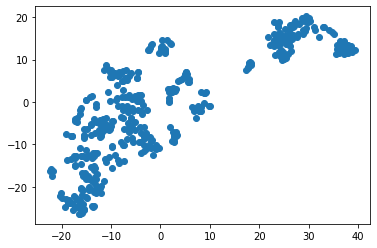

In [99]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## task2

In [100]:
from sklearn.cluster import KMeans

In [144]:
KM_model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [145]:
KM_train_labels = KM_model.fit_predict(X_train)

In [151]:
KM_centers = St_scaler.inverse_transform(KM_model.cluster_centers_)

array([[7.19785604e+00, 3.75477332e+02, 6.84599311e+01, 8.91644611e-02,
        6.16883845e-01, 1.08629435e+01, 1.77948859e+03, 1.32655758e+01,
        4.77456686e+01, 5.21722837e+04, 5.76642585e+01, 3.53560500e+04,
        8.57439378e+01],
       [1.30900504e+02, 1.15693069e+01, 1.34161460e+02, 8.01088524e-02,
        6.35623924e-01, 1.06636961e+01, 2.55070539e+03, 8.08747230e+00,
        1.99479999e+02, 1.06612120e+05, 6.25427367e+01, 5.87815979e+03,
        1.50381404e+02],
       [1.07723463e+02, 1.15693069e+01, 1.38243420e+02, 9.89534310e-02,
        6.35924457e-01, 1.05626405e+01, 2.55955749e+03, 8.19444013e+00,
        2.08481483e+02, 1.11232776e+05, 6.32735369e+01, 3.45316661e+04,
        1.40073599e+02]])

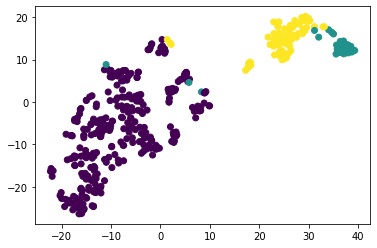

In [153]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=KM_train_labels)
plt.show()

In [160]:
print(f'ТРЕНИРОВОЧНЫЕ ДАННЫЕ\n\n'
      f'Кластер 0:\n'
      f'    среднее price - {pd.DataFrame(y_train).loc[KM_train_labels == 0].mean()[0]}\n'
      f'    среднее CRIM - {X_train.loc[KM_train_labels == 0, "CRIM"].mean()}\n'
      f'Кластер 1:\n'
      f'    среднее price - {pd.DataFrame(y_train).loc[KM_train_labels == 1].mean()[0]}\n'
      f'    среднее CRIM - {X_train.loc[KM_train_labels == 1, "CRIM"].mean()}\n'
      f'Кластер 2:\n'
      f'    среднее price - {pd.DataFrame(y_train).loc[KM_train_labels == 2].mean()[0]}\n'
      f'    среднее CRIM - {X_train.loc[KM_train_labels == 2, "CRIM"].mean()}')

ТРЕНИРОВОЧНЫЕ ДАННЫЕ

Кластер 0:
    среднее price - 25.168686868686873
    среднее CRIM - 0.40486282828282844
Кластер 1:
    среднее price - 13.196774193548386
    среднее CRIM - 14.360380322580648
Кластер 2:
    среднее price - 17.4421052631579
    среднее CRIM - 11.745661842105266


## task3

In [149]:
KM_test_labels = KM_model.predict(X_test)

In [156]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

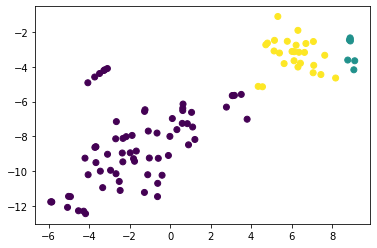

In [157]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=KM_test_labels)
plt.show()

In [161]:
print(f'ТЕСТОВЫЕ ДАННЫЕ\n\n'
      f'Кластер 0:\n'
      f'    среднее price - {pd.DataFrame(y_test).loc[KM_test_labels == 0].mean()[0]}\n'
      f'    среднее CRIM - {X_test.loc[KM_test_labels == 0, "CRIM"].mean()}\n'
      f'Кластер 1:\n'
      f'    среднее price - {pd.DataFrame(y_test).loc[KM_test_labels == 1].mean()[0]}\n'
      f'    среднее CRIM - {X_test.loc[KM_test_labels == 1, "CRIM"].mean()}\n'
      f'Кластер 2:\n'
      f'    среднее price - {pd.DataFrame(y_test).loc[KM_test_labels == 2].mean()[0]}\n'
      f'    среднее CRIM - {X_test.loc[KM_test_labels == 2, "CRIM"].mean()}')

ТЕСТОВЫЕ ДАННЫЕ

Кластер 0:
    среднее price - 23.911594202898552
    среднее CRIM - 0.2464211594202899
Кластер 1:
    среднее price - 12.814285714285713
    среднее CRIM - 19.021665714285714
Кластер 2:
    среднее price - 17.39230769230769
    среднее CRIM - 8.469301923076923
